### DATA LOADING

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import os
import openpyxl as xl
import math


In [3]:
# Loading the data
dir_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw")
data_path = os.path.join(dir_path, "Concrete_Data.xlsx")

df = pd.read_excel(data_path)
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.tail(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


### EXPLANATORY DATA ANALYSIS

In [5]:
# Data shape
df.shape

(1030, 9)

We have 1030 rows of data and 9 different columns with different variables

In [6]:
# Data types
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


Most of the data types are float while only Age is of the integer data types, nonetheless all of them are numerical data

In [7]:
# Check for missing values
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

 We have no missing values in our data

In [8]:
# Check for duplicates
df[df.duplicated()]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [9]:
# Dropping the duplicates
df = df.drop_duplicates(keep='first')
df.shape

(1005, 9)

In [10]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


- The range is great with none having negative values which is positive or cement data as cement can not be negative.

### UNIVARIATE ANALYSIS

- Here we will be looking at each feature and exploring them individually.
- We will not be checking for outliers at this stage rather at the pre-processing stage to prevent issues related to data leakage on testing data.

In [16]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='str')

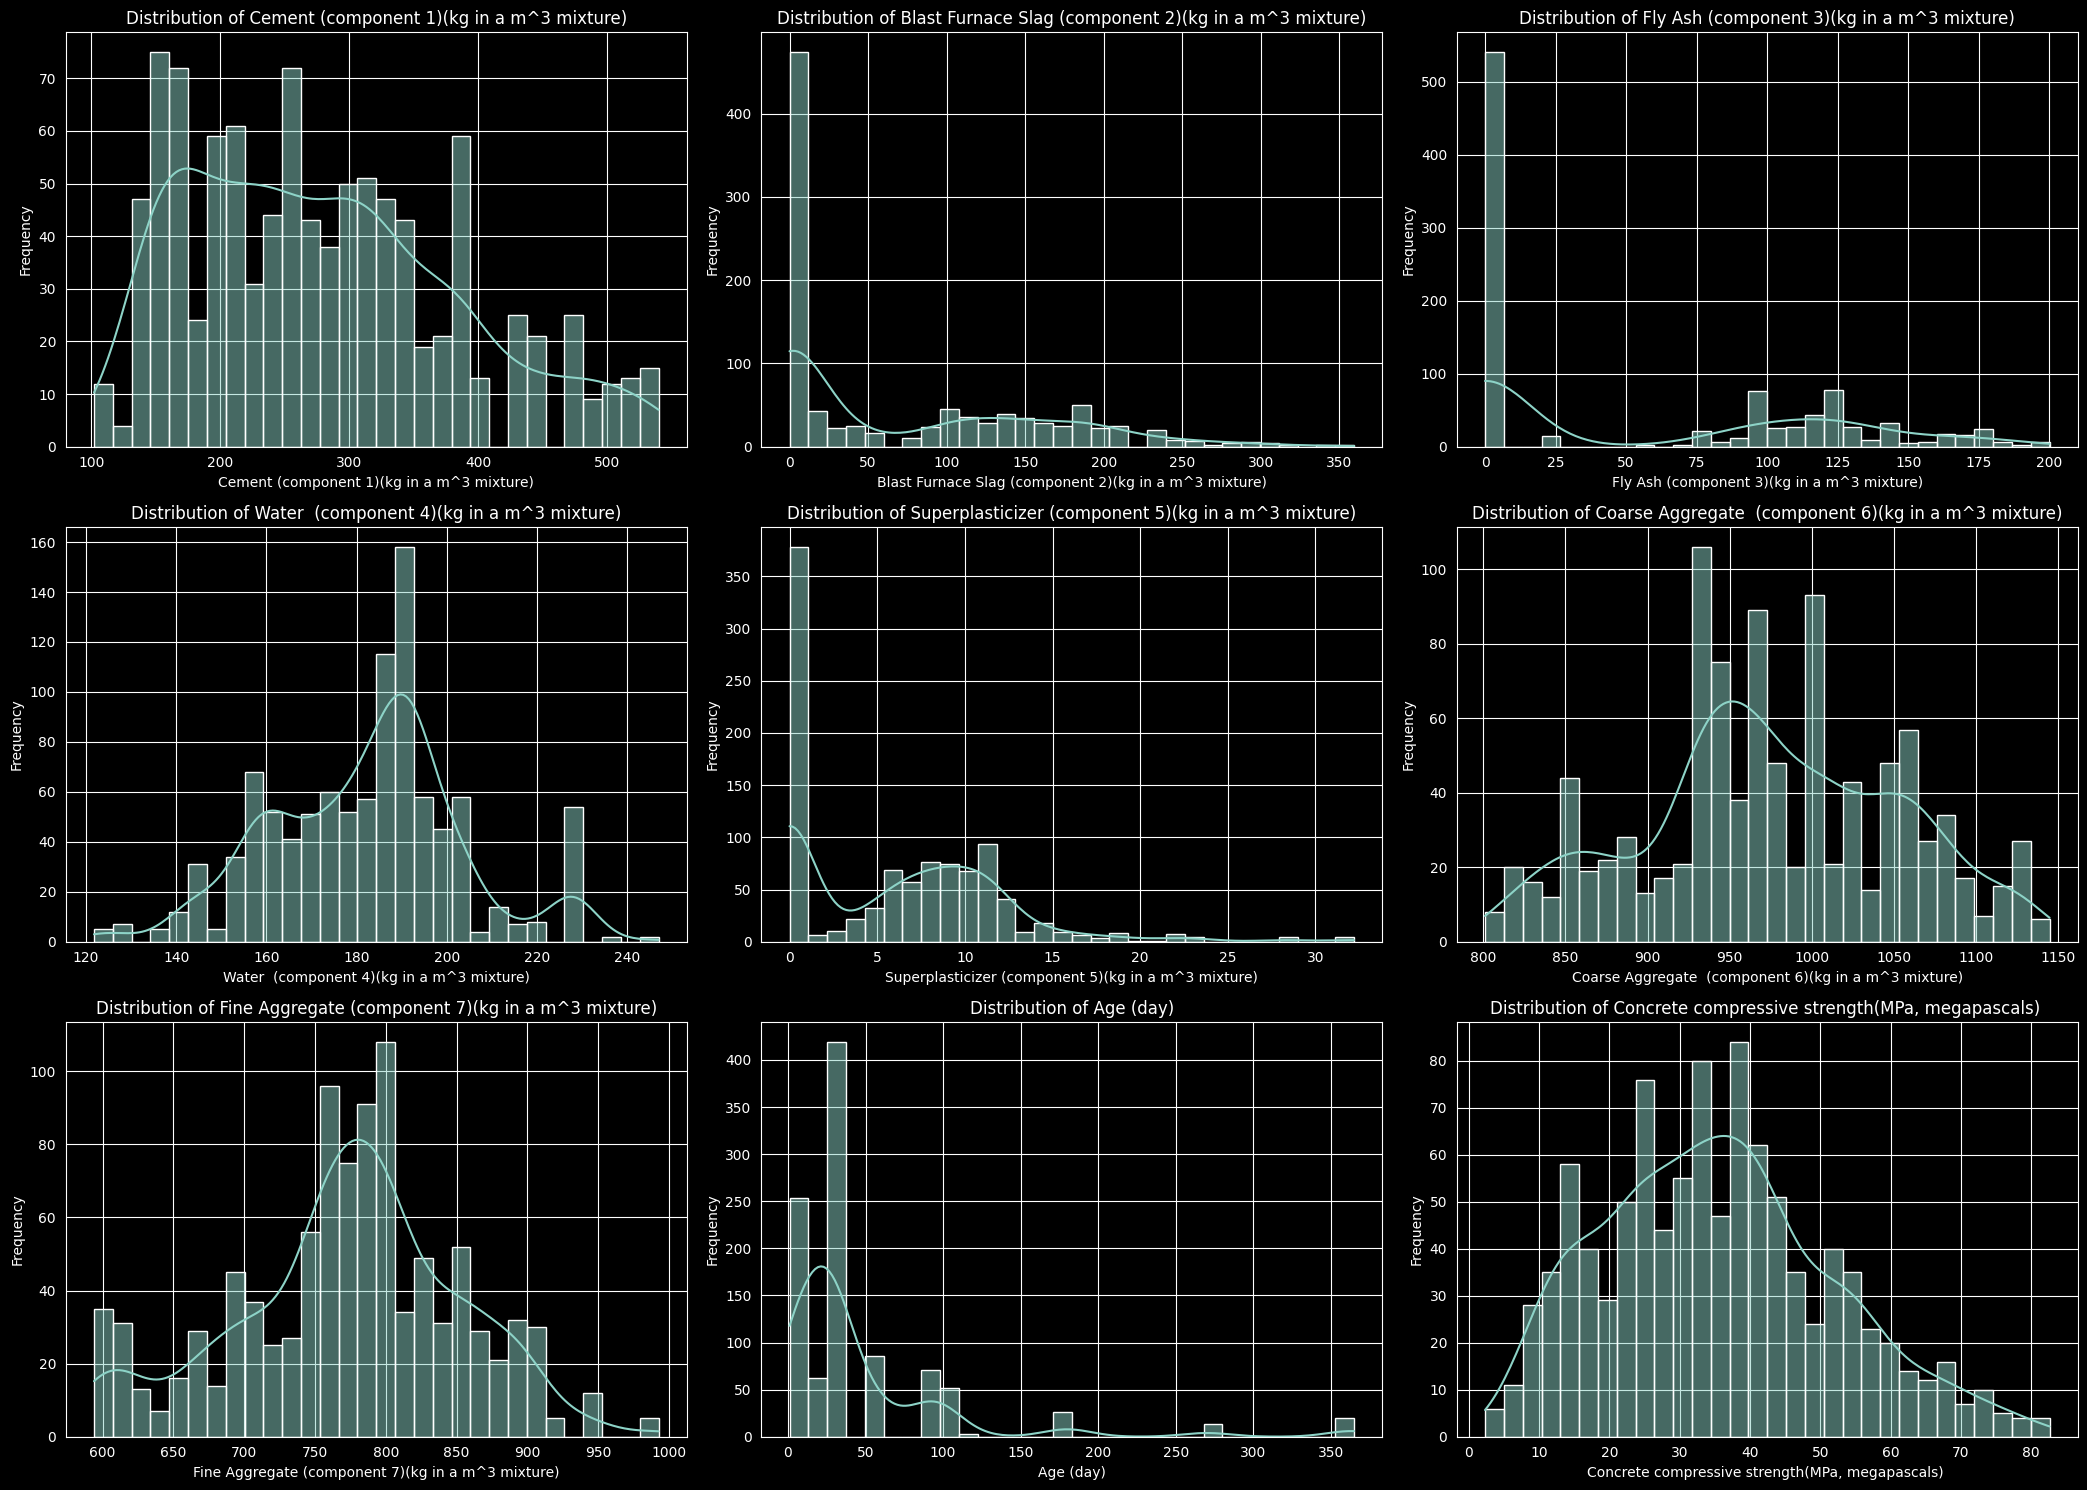

In [11]:
# Finding the distribution shape of each column to understand the data
def distribution_shape(df, cols_per_row = 3):
    #Only plot for numeric columns
    numeric_cols = df.select_dtypes(include = "number").columns
    n_columns = len(numeric_cols)
    n_rows = math.ceil (n_columns / cols_per_row)

    # Create sub-plots
    fig, axes = plt.subplots(n_rows,cols_per_row, figsize = (7*cols_per_row, 5*n_rows))
    axes = axes.flatten()   # Flatten to 1D for easy iteration.
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde = True, bins = 30, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Turn off any extra or empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

distribution_shape(df, cols_per_row = 3)

## Concrete Mix Dataset - Distribution Summary
Summary of the distribution of each variable in the concrete mix dataset.
### Feature Distributions

**Cement**: Slightly right skewed. Most mixes use **150–350 kg/m³**, with fewer high-cement mixes.

**Blast Furnace Slag**: Heavily right skewed. Most samples have **zero or very low slag**. It is an optional additive and many mixes do not use it.

**Fly Ash**: Heavily right skewed. Similar to slag, it is an optional additive and the majority of mixes have **zero fly ash**.

**Water**: Fairly normally distributed, centered around **180 kg/m³**. This is the most controlled ingredient in the mix design.

**Superplasticizer**: Heavily right skewed. Many mixes use **none at all**, with a smaller group using moderate amounts.

**Coarse Aggregate**: Roughly uniform or bimodal. Two popular quantity ranges are visible, suggesting **two common mix design families** in the dataset.

**Fine Aggregate**: Slightly right skewed, centered around **750–800 kg/m³**. Reasonably well distributed.

**Age**: Very heavily right skewed. Most samples were tested at **early ages (~28 days)**; very few at 90–365 days. **Log transformation** is recommended for modeling.

**Compressive Strength (Target)**: Right skewed, centered around **30–40 MPa**. Not perfectly normal; a **log transformation** may be considered for modeling.

### Key Takeaways

1. **Zero-heavy features**: Slag, Fly Ash, and Superplasticizer have many zeros, following a **zero-inflated distribution**.
2. **Log transformation needed**: Age and Compressive Strength both exhibit strong right skew and may benefit from log transformation before modeling.
3. **Controlled variables**: Water and Cement are generally well-behaved and mostly centered around typical ranges.
4. **Potential mix families**: Coarse Aggregate shows bimodal tendencies, indicating different mix design approaches.

This summary will guide preprocessing and feature engineering for predictive modeling of concrete strength.

### BIVARIATE ANALYSIS
Since Compressive strength our output is the main feature, we want to observe how other features relate to it.

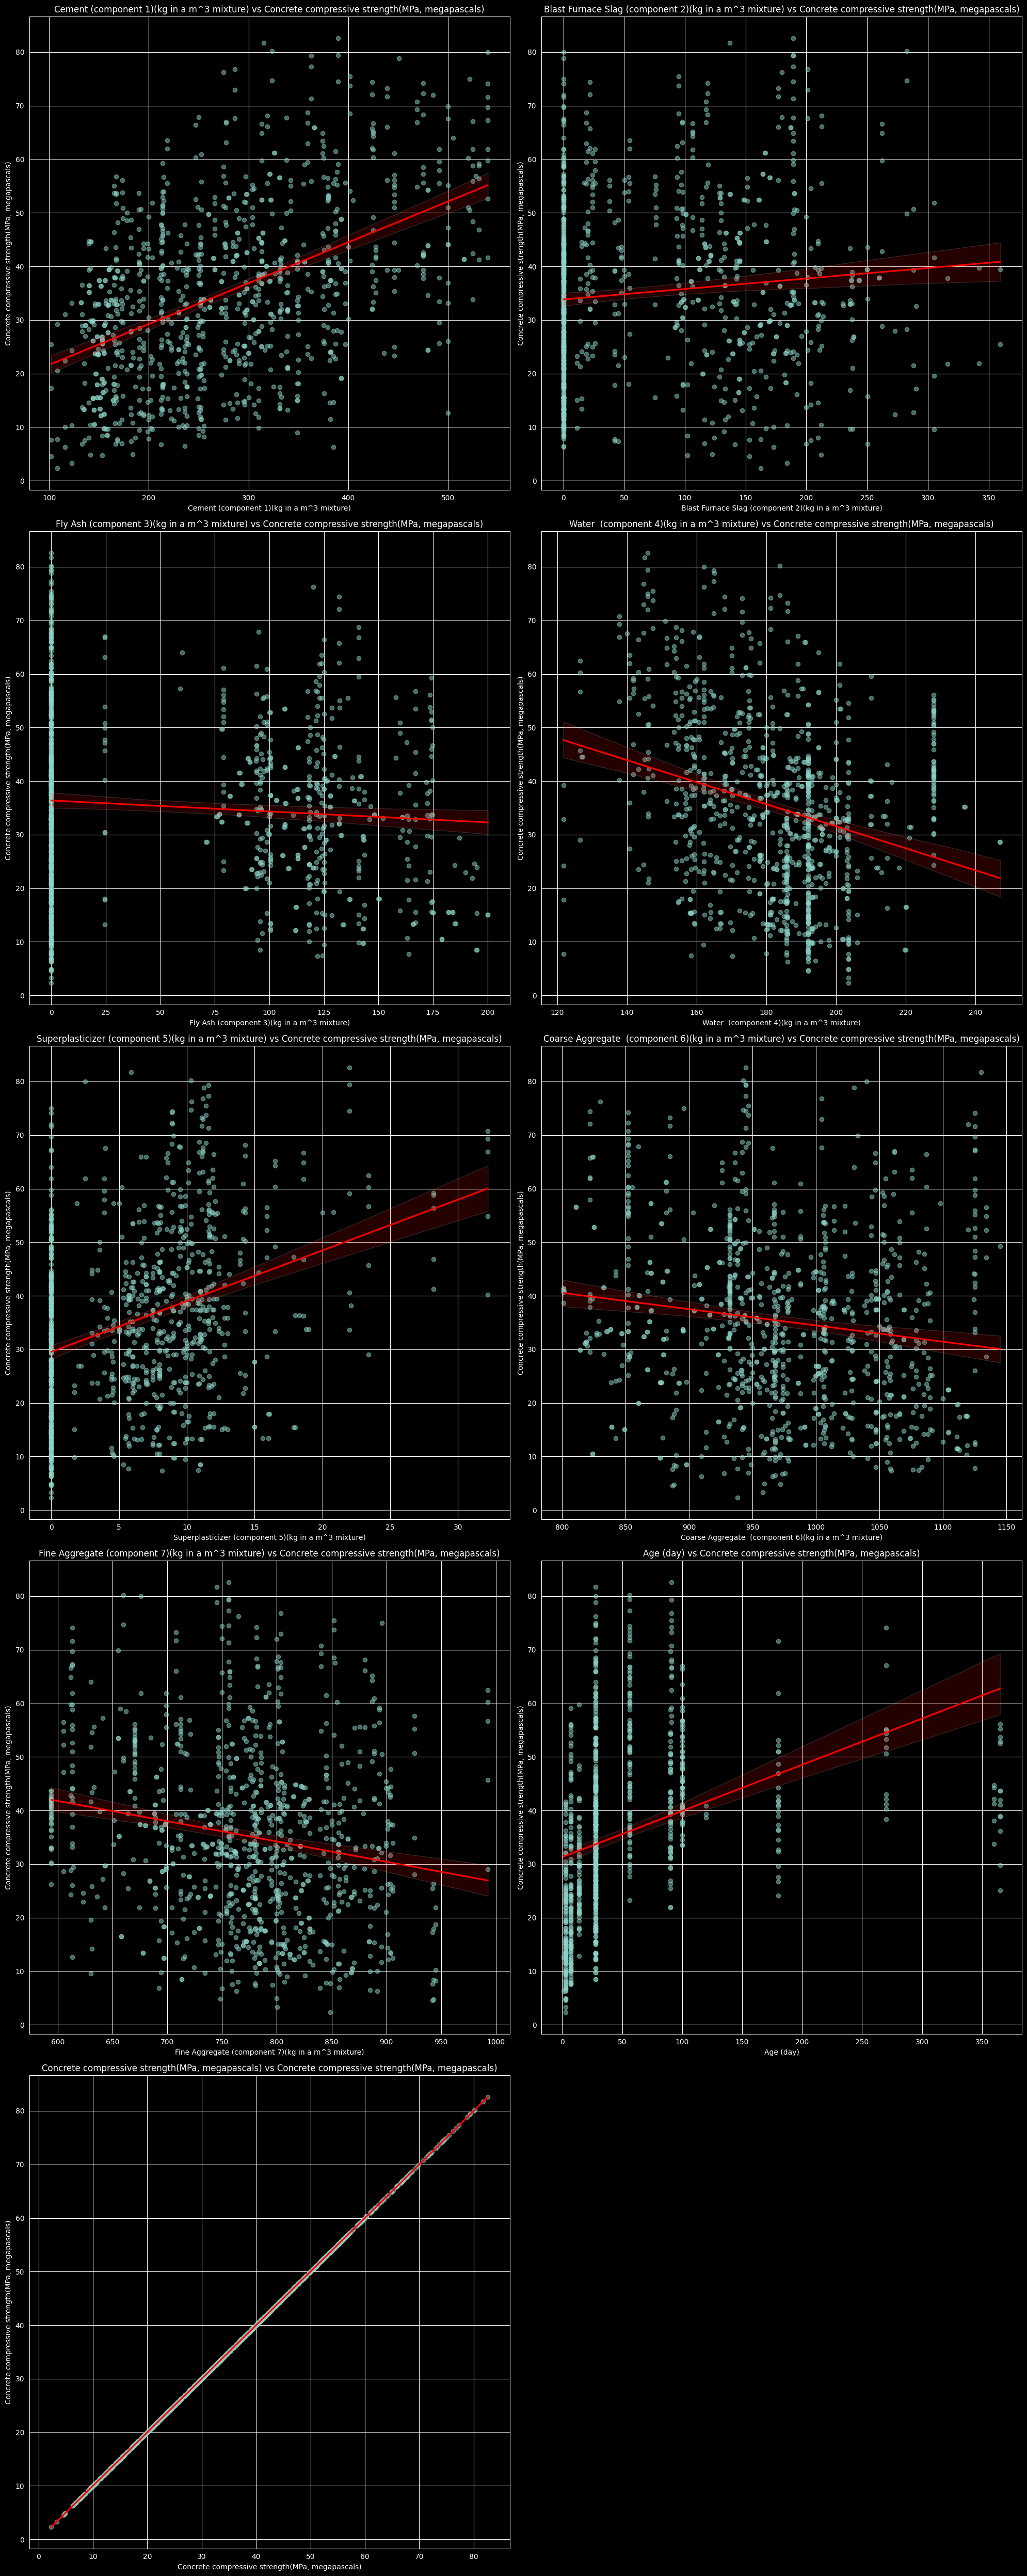

In [21]:
def plot_target_relationships(df, cols_per_row = 2):
    df.columns = df.columns.str.strip()
    target_col= "Concrete compressive strength(MPa, megapascals)"
    numeric_cols = df.select_dtypes(include = "number").columns
    n_cols = len(numeric_cols)
    n_rows = math.ceil(n_cols / cols_per_row)

    # Plotting the sub-plots
    fig, axes = plt.subplots(n_rows,cols_per_row, figsize = (10*cols_per_row, 10*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.regplot(x=df[col], y=df[target_col], ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        axes[i].set_title(f"{col} vs {target_col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)

    # Turn off any empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

plot_target_relationships(df, cols_per_row = 2)

# Bivariate Analysis of Concrete Compressive Strength Dataset

This analysis explores how each numeric feature relates to **Concrete Compressive Strength (MPa)** using scatter plots and regression lines.

---

## Feature Insights

### Cement vs Strength
- Relationship: Strong positive
- Insight: As cement increases, strength increases consistently. Trend is slightly non-linear, curving upward. Cement is one of the most important features in the model.

### Blast Furnace Slag vs Strength
- Relationship: Weak positive
- Insight: Many mixes have zero slag, forming a vertical cluster at 0. When used, slag contributes to strength, but the effect is noisy and depends on age and cement content.

### Fly Ash vs Strength
- Relationship: Flat to slightly negative
- Insight: Fly Ash is a slow-reacting material, so its effect appears only at later ages. Interaction with Age is important.

### Water vs Strength
- Relationship: Negative
- Insight: Higher water content lowers strength, confirming the water-to-cement ratio theory. Key feature in concrete engineering.

### Superplasticizer vs Strength
- Relationship: Positive but clustered
- Insight: Most samples use no superplasticizer, forming a vertical cluster at 0. Where used, the trend is positive. Consider creating a binary feature indicating usage.

### Coarse Aggregate vs Strength
- Relationship: Very weak / flat
- Insight: Strength is scattered across all values. Alone, this feature carries little predictive power.

### Fine Aggregate vs Strength
- Relationship: Very weak / slightly negative
- Insight: More about workability and void-filling than direct strength contribution.

### Age vs Strength
- Relationship: Strong positive, non-linear
- Insight: Older concrete is stronger. Most samples are clustered at early ages; strength rises steeply then flattens. Log transformation is recommended.

---

## Key Takeaways and Recommended Actions

| Feature             | Relationship          | Recommended Action                     |
|--------------------|--------------------|---------------------------------------|
| Cement             | Strong positive     | Keep as-is                             |
| Water              | Strong negative     | Maintain and engineer w/c ratio        |
| Age                | Non-linear positive | Apply log transformation               |
| Blast Furnace Slag | Weak positive       | Consider interaction with Age          |
| Fly Ash            | Flat / misleading   | Include Age interaction                |
| Superplasticizer   | Positive, clustered | Consider binary "used or not" flag    |
| Coarse Aggregate   | Very weak           | May drop or keep                       |
| Fine Aggregate     | Very weak           | May drop or keep                       |

---

## Summary
- Cement and water show the strongest relationships with compressive strength.
- Age is non-linear and will benefit from log transformation.
- Features like Fly Ash, Slag, and Superplasticizer are zero-heavy and may need interaction or transformation.
- Coarse and fine aggregates show weak direct correlation but may contribute indirectly in combination with other features.

## CORRELATION ANALYSIS
- The aim is to understand how different variable correlate to one another, that is how they relate.

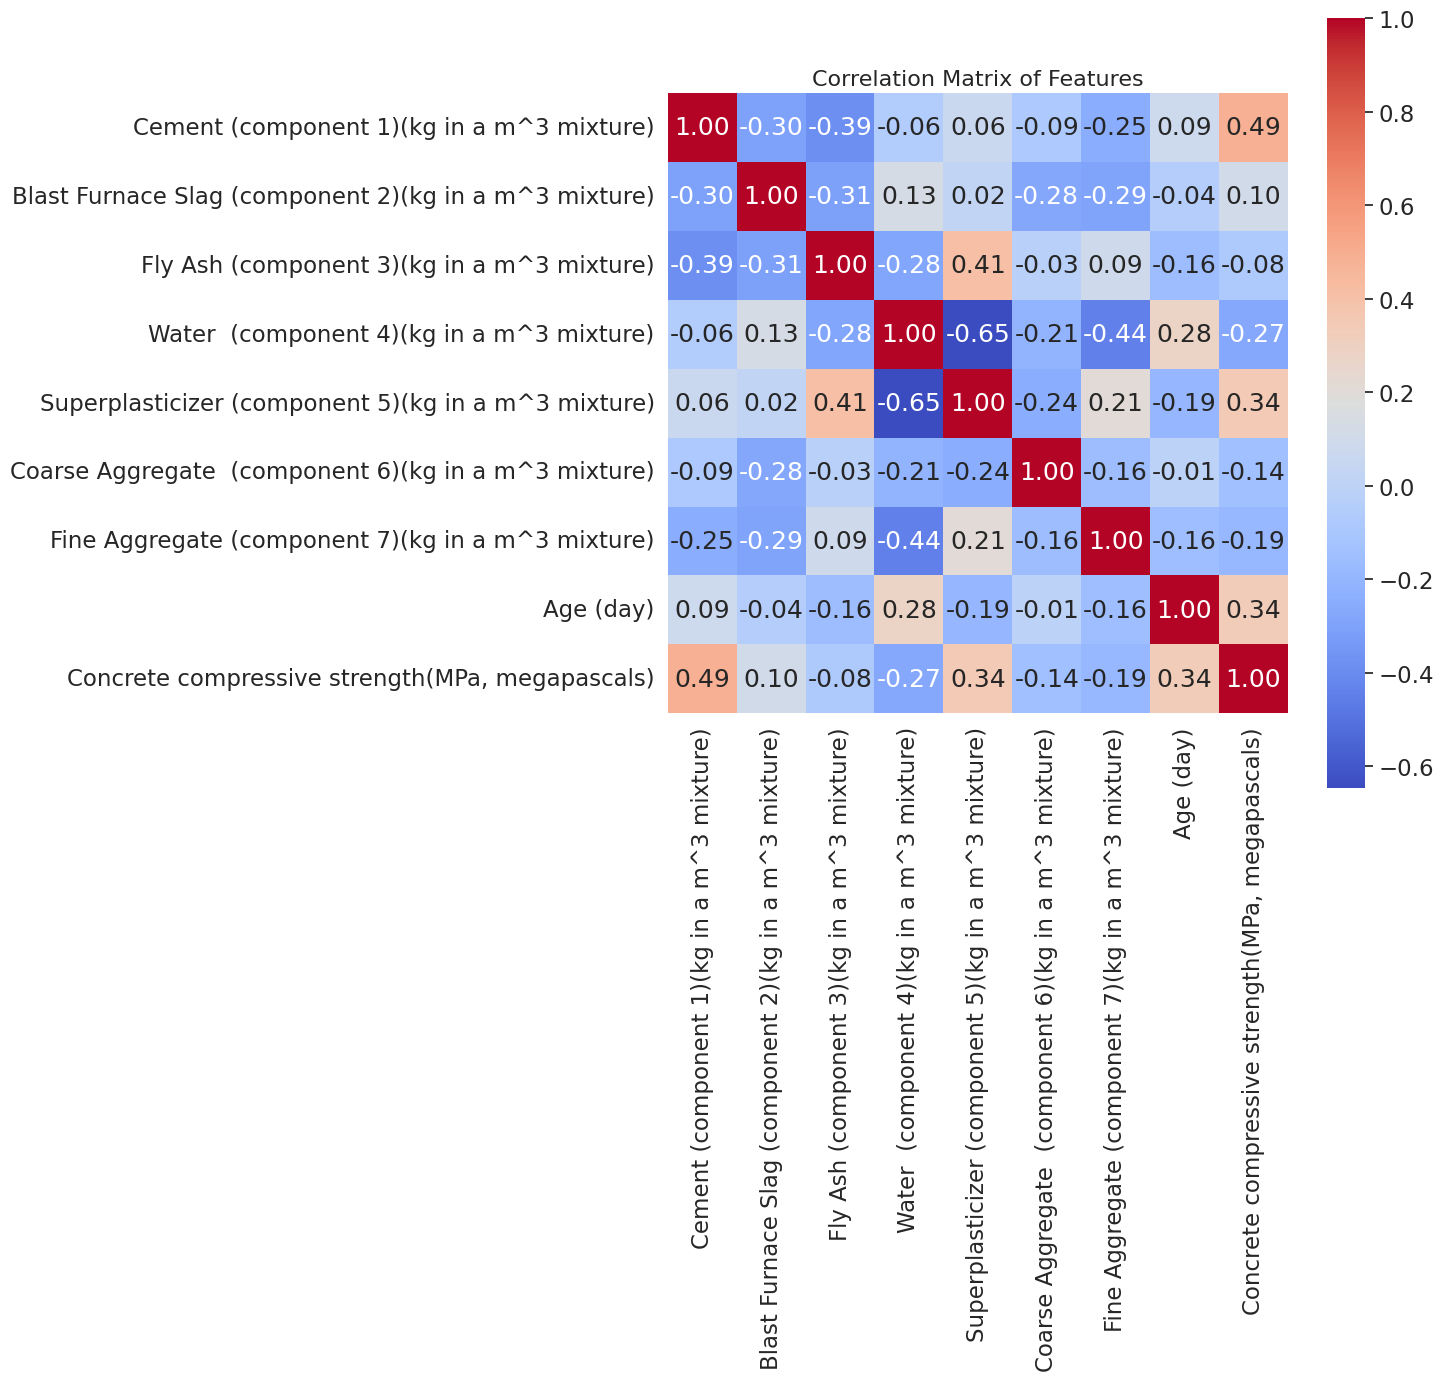

In [25]:
# Correlation matrix (Heatmap)
plt.figure(figsize = (10,10))
sns.set(font_scale = 1.5)
corr_matrix = df.corr()
heatmap = sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", cbar = True, square = True) #.2f formats the numbers to 2dp
plt.title("Correlation Matrix of Features", fontsize = 16)
plt.show()

## Correlation Analysis

This section explores the relationships between features and the target variable, **Concrete Compressive Strength (MPa)**, using a correlation matrix heatmap.

---

## Features vs Target (Compressive Strength)

The table below summarizes how strongly each feature correlates with compressive strength.

| Feature            | Correlation | Interpretation |
|--------------------|-------------|----------------|
| Cement             | +0.49       | Strongest predictor. Positive relationship as expected. |
| Age                | +0.34       | Second strongest. Older concrete is stronger. |
| Superplasticizer   | +0.34       | Positive. Helps reduce water requirement and improves strength. |
| Water              | -0.27       | Negative. Confirms water-cement ratio theory. |
| Fine Aggregate     | -0.19       | Weak negative relationship. |
| Coarse Aggregate   | -0.14       | Very weak negative relationship. |
| Blast Furnace Slag | +0.10       | Weak positive. Slow acting material. |
| Fly Ash            | -0.08       | Almost zero. Effect depends heavily on age. |

**Key Insight:** Cement, Age, and Superplasticizer are the top three raw predictors of compressive strength.

---

## Multicollinearity (Feature Interactions)

Understanding relationships between features is critical for model selection.

### Key Relationships

| Feature Pair | Correlation | Interpretation |
|--------------|-------------|----------------|
| Water ↔ Superplasticizer | -0.65 | Strong inverse relationship. Superplasticizer is used to reduce water content. |
| Fly Ash ↔ Superplasticizer | +0.41 | Modern mixes often use both together. |
| Cement ↔ Fly Ash | -0.39 | Fly Ash replaces part of cement in mix design. |
| Cement ↔ Slag | -0.30 | Slag also substitutes cement partially. |
| Fine Aggregate ↔ Water | -0.44 | Higher fine aggregate mixes tend to use less water. |

---

## What This Means for the Project

### Feature Engineering

The substitution patterns between Cement, Slag, and Fly Ash strongly support creating engineered features:

- **Total Binder = Cement + Slag + Fly Ash**
- **Water-Cement Ratio (w/c)**

These engineered features are expected to improve model performance.

### Model Selection

The strong multicollinearity between Water and Superplasticizer (-0.65) suggests that:

- Linear Regression may be unstable or unreliable.
- Tree-based models such as Random Forest and XGBoost are more appropriate because they handle correlated features naturally.

### Feature Importance Considerations

Coarse Aggregate and Fine Aggregate show weak correlations with strength. They may not be strong predictors individually but still contribute to the overall mix balance.

---

## Summary

Cement is the strongest predictor of compressive strength, followed by Age and Superplasticizer. Water negatively impacts strength, confirming established engineering theory. Slag and Fly Ash act as cement replacement materials, explaining their negative correlation with cement. Aggregates contribute less individually. Due to multicollinearity between several features, especially Water and Superplasticizer, non-linear tree-based models are likely the most suitable approach for this problem.

## ENGINEERING DRIVEN ANALYSIS